In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark


In [2]:
import os
import random
import time
import matplotlib.pyplot as plt

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [3]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf

spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
sc = SparkContext.getOrCreate(spark.conf)


In [4]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1xWfOl7SXQVwt0jZGAvIuQ16aEOgA5UOF' -O 'JaneAustine.txt'

--2023-11-17 11:36:31--  https://docs.google.com/uc?export=download&id=1xWfOl7SXQVwt0jZGAvIuQ16aEOgA5UOF
Resolving docs.google.com (docs.google.com)... 142.251.2.138, 142.251.2.102, 142.251.2.139, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3rtjvq713v2440o8drf6o4mh3oaapqdu/1700220975000/18299167658175267698/*/1xWfOl7SXQVwt0jZGAvIuQ16aEOgA5UOF?e=download&uuid=e282d7f5-c68b-43b4-9ab7-b2b67a4f4434 [following]
--2023-11-17 11:36:33--  https://doc-0o-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3rtjvq713v2440o8drf6o4mh3oaapqdu/1700220975000/18299167658175267698/*/1xWfOl7SXQVwt0jZGAvIuQ16aEOgA5UOF?e=download&uuid=e282d7f5-c68b-43b4-9ab7-b2b67a4f4434
Resolving doc-0o-4c-docs.googleusercontent.com (doc-0o-4c-docs.googleusercontent.com)... 142.250.101.132, 2607:f8b0:402

In [5]:
def change_core(data_path, cores):
    startTime = time.time()
    spark = SparkSession.builder.master(f"local[{cores}]").getOrCreate()
    spark.conf.set("spark.sql.repl.eagerEval.enabled", True)
    sc = SparkContext.getOrCreate(spark.conf)

    data = sc.textFile(data_path)
    nonEmptyLines = data.filter(lambda x: len(x) > 0)
    words = nonEmptyLines.flatMap(lambda x: x.split(' '))
    wordCount = words.map(lambda x: (x, 1)).reduceByKey(lambda x,y: x + y).map(lambda x: (x[1], x[0])).sortByKey(False).collect()

    num_cores = spark.sparkContext.defaultParallelism
    spark.stop()
    endTime = time.time()
    executionTime = endTime - startTime
    return (wordCount, num_cores, executionTime)



path = '/content/JaneAustine.txt'
results = [change_core(path, i) for i in range(1, 5)]

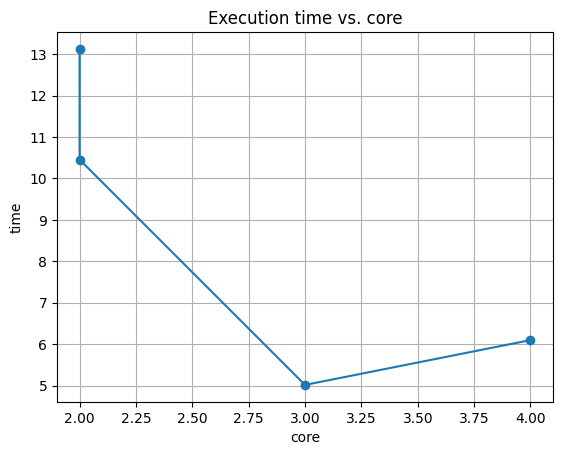

In [6]:
cores = [result[1] for result in results]
times = [result[2] for result in results]

plt.plot(cores, times, marker='o')
plt.title('Execution time vs. core')
plt.xlabel('core')
plt.ylabel('time')
plt.grid(True)
plt.show();

In [7]:
results

[([(26654, 'the'),
   (25322, 'to'),
   (22761, 'of'),
   (22184, 'and'),
   (13772, 'a'),
   (11686, 'I'),
   (11523, 'in'),
   (11427, 'her'),
   (11342, 'was'),
   (8548, 'not'),
   (8339, 'be'),
   (8012, 'she'),
   (7966, 'that'),
   (7412, 'had'),
   (7243, 'as'),
   (6800, 'it'),
   (6703, 'for'),
   (6070, 'with'),
   (5872, 'his'),
   (5835, 'you'),
   (5756, 'he'),
   (5589, 'have'),
   (4932, 'is'),
   (4835, 'at'),
   (4651, ''),
   (4237, 'but'),
   (3766, 'by'),
   (3753, 'very'),
   (3674, 'so'),
   (3567, 'could'),
   (3561, 'on'),
   (3479, 'all'),
   (3457, 'my'),
   (3348, 'been'),
   (3284, 'would'),
   (3232, 'which'),
   (3078, 'were'),
   (2937, 'from'),
   (2724, 'Mr.'),
   (2686, 'no'),
   (2497, 'him'),
   (2450, 'they'),
   (2373, 'or'),
   (2299, 'an'),
   (2275, 'will'),
   (2188, 'any'),
   (2176, 'must'),
   (2157, 'their'),
   (2152, 'Mrs.'),
   (2106, 'such'),
   (2105, 'what'),
   (2031, 'She'),
   (2030, 'more'),
   (2013, 'than'),
   (2007, 'your'),


In [8]:
spark.stop()